In [1]:
import os
import pandas as pd

current_folder = os.getcwd()
xs = pd.read_csv(os.path.join(current_folder, "data", "xs_signals.csv"))
xs = xs.set_index("Mass")

In [2]:
xs.sample()

,Zprime_tau_m_right_bottom_left,Zprime_tau_m_left_bottom_left,Zprime_tau_m_left_bottom_right,Zprime_tau_m_right_bottom_right,sLQ_tau_m_right,vLQ_tau_m_L_tau_p_R,vLQ_tau_m_R_tau_p_L,vLQ_tau_m_L_tau_p_L,vLQ_tau_m_R_tau_p_R
Mass,,,,,,,,,
2850,0.00003,0.00003,0.00003,0.00003,0.000107,0.000137,0.000116,0.000375,0.000372


In [3]:
z_prime_parameters = {
    r"\zeta_Q": 1.0,  # bottom left
    r"\zeta_L": 1.0,  # tau left
    r"\zeta_b": 0.8,  # bottom right
    r"\zeta_\tau": 0.6,  # tau right
}

vlq_parameters = {
    # r"$\beta_L$": 1.0, # tau left
    r"$\beta_R$": -0.85,  # tau right
}

scale_factors = {
    "Zprime_tau_m_right_bottom_right": (
        z_prime_parameters[r"\zeta_b"] * z_prime_parameters[r"\zeta_\tau"]
    )
    ** 2,
    "Zprime_tau_m_right_bottom_left": (
        z_prime_parameters[r"\zeta_Q"] * z_prime_parameters[r"\zeta_\tau"]
    )
    ** 2,
    "Zprime_tau_m_left_bottom_right": (
        z_prime_parameters[r"\zeta_b"] * z_prime_parameters[r"\zeta_L"]
    )
    ** 2,
    "Zprime_tau_m_left_bottom_left": (
        z_prime_parameters[r"\zeta_Q"] * z_prime_parameters[r"\zeta_L"]
    )
    ** 2,
    "vLQ_tau_m_L_tau_p_R": (1 * 1) ** 2,
    "vLQ_tau_m_R_tau_p_L": (vlq_parameters[r"$\beta_R$"] * vlq_parameters[r"$\beta_R$"]) ** 2,
    "vLQ_tau_m_L_tau_p_L": (vlq_parameters[r"$\beta_R$"]) ** 2,
    "vLQ_tau_m_R_tau_p_R": (vlq_parameters[r"$\beta_R$"]) ** 2,
    "sLQ_tau_m_right": 1.0**2,
    "sLQ_tau_m_left": 1.0**2,
}

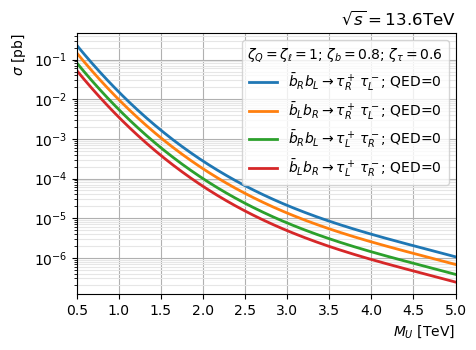

In [4]:
xs_process = {
    "Zprime_tau_m_left_bottom_left": r"$ \bar b_R b_L \to \tau^+_R \, \tau^-_L$; QED=0",
    "Zprime_tau_m_left_bottom_right": r"$ \bar b_L b_R \to \tau^+_R \, \tau^-_L$; QED=0",  # a
    "Zprime_tau_m_right_bottom_left": r"$ \bar b_R b_L \to \tau^+_L \, \tau^-_R$; QED=0",  # b
    "Zprime_tau_m_right_bottom_right": r"$ \bar b_L b_R \to \tau^+_L \, \tau^-_R$; QED=0",
}

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline as SPLine


width = 3.6
plt.figure(figsize=(width * 4 / 3, width))
for process in xs_process.keys():
    x = xs.index.values / 1000
    y = xs[process] * scale_factors.get(process, 1)
    # Remove NaNs or infs if present
    mask = np.isfinite(y)
    x_valid = x[mask]
    y_valid = y[mask]
    # Spline interpolation (only if enough points)
    if "vLQ_tau_m_R_tau_p_R" in process:
        line_style = ":"
        line_width = 2.4
    else:
        line_style = "-"
        line_width = 2.0
    if len(x_valid) > 3:
        log_y_valid = np.log10(y_valid)
        x_smooth = np.linspace(x_valid.min(), x_valid.max(), 300)
        spline = SPLine(x_valid, log_y_valid, s=1)
        log_y_smooth = spline(x_smooth)
        y_smooth = 10**log_y_smooth
        plt.plot(
            x_smooth,
            y_smooth,
            label=xs_process[process],
            linestyle=line_style,
            linewidth=line_width,
        )
    else:
        plt.plot(
            x_valid, y_valid, label=xs_process[process], linestyle=line_style, linewidth=line_width
        )

plt.yscale("log")
plt.xlabel(r"$M_U$ [TeV]", loc="right")
# x range
plt.xlim(min(xs.index) / 1000, max(xs.index) / 1000)
plt.ylabel(r"$\sigma$ [pb]", loc="top")
plt.title(r"$\sqrt{s}= 13.6$TeV", loc="right")
plt.legend(title=fr"$\zeta_{{Q}}=\zeta_{{\ell}}=1$; $\zeta_b={z_prime_parameters[r"\zeta_b"]}$; $\zeta_\tau={z_prime_parameters[r"\zeta_\tau"]}$")
plt.grid()
plt.grid(which="minor", color="0.9")
plt.tight_layout()


plt.savefig(
    os.path.join(current_folder, "xs_Zprime_tau_tau.pdf")
)

plt.show()

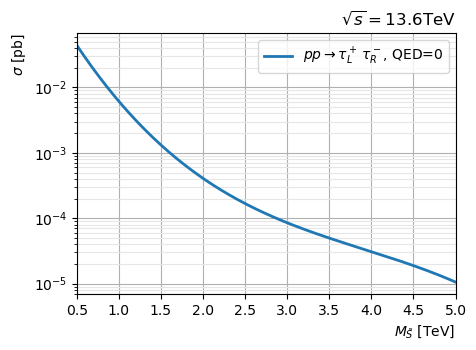

In [5]:
xs_process = {
    "sLQ_tau_m_right": r"$ p p \to \tau^+_L \, \tau^-_R$, QED=0",
    # "sLQ_tau_m_left": r"$ p p \to \tau^+_R \, \tau^-_L$, QED=0",
}


plt.figure(figsize=(width * 4 / 3, width))
for process in xs_process.keys():
    x = xs.index.values / 1000
    y = xs[process] * scale_factors.get(process, 1)
    # Remove NaNs or infs if present
    mask = np.isfinite(y)
    x_valid = x[mask]
    y_valid = y[mask]
    # Spline interpolation (only if enough points)
    if "vLQ_tau_m_R_tau_p_R" in process:
        line_style = ":"
        line_width = 2.4
    else:
        line_style = "-"
        line_width = 2.0
    if len(x_valid) > 3:
        log_y_valid = np.log10(y_valid)
        x_smooth = np.linspace(x_valid.min(), x_valid.max(), 300)
        spline = SPLine(x_valid, log_y_valid, s=1)
        log_y_smooth = spline(x_smooth)
        y_smooth = 10**log_y_smooth
        plt.plot(
            x_smooth,
            y_smooth,
            label=xs_process[process],
            linestyle=line_style,
            linewidth=line_width,
        )
    else:
        plt.plot(
            x_valid, y_valid, label=xs_process[process], linestyle=line_style, linewidth=line_width
        )

plt.yscale("log")
plt.xlabel(r"$M_{\tilde S}$ [TeV]", loc="right")
# x range
plt.xlim(min(xs.index) / 1000, max(xs.index) / 1000)
plt.ylabel(r"$\sigma$ [pb]", loc="top")
plt.title(r"$\sqrt{s}= 13.6$TeV", loc="right")
plt.legend()
plt.grid()
plt.grid(which="minor", color="0.9")
plt.tight_layout()


plt.savefig(
    os.path.join(current_folder, "xs_sLQ_tau_tau.pdf")
)

plt.show()

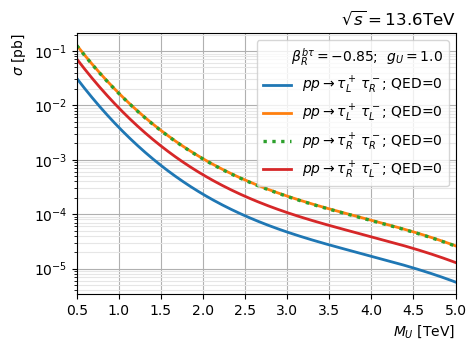

In [6]:
xs_process = {
    "vLQ_tau_m_R_tau_p_L": r"$ p p \to \tau^+_L \, \tau^-_R$; QED=0",
    "vLQ_tau_m_L_tau_p_L": r"$ p p \to \tau^+_L \, \tau^-_L$; QED=0",  # b
    "vLQ_tau_m_R_tau_p_R": r"$ p p \to \tau^+_R \, \tau^-_R$; QED=0",  # a
    "vLQ_tau_m_L_tau_p_R": r"$ p p \to \tau^+_R \, \tau^-_L$; QED=0",
}


plt.figure(figsize=(width * 4 / 3, width))
for process in xs_process.keys():
    x = xs.index.values / 1000
    y = xs[process] * scale_factors.get(process, 1)
    # Remove NaNs or infs if present
    mask = np.isfinite(y)
    x_valid = x[mask]
    y_valid = y[mask]
    # Spline interpolation (only if enough points)
    if "vLQ_tau_m_R_tau_p_R" in process:
        line_style = ":"
        line_width = 2.4
    else:
        line_style = "-"
        line_width = 2.0
    if len(x_valid) > 3:
        log_y_valid = np.log10(y_valid)
        x_smooth = np.linspace(x_valid.min(), x_valid.max(), 300)
        spline = SPLine(x_valid, log_y_valid, s=1)
        log_y_smooth = spline(x_smooth)
        y_smooth = 10**log_y_smooth
        plt.plot(
            x_smooth,
            y_smooth,
            label=xs_process[process],
            linestyle=line_style,
            linewidth=line_width,
        )
    else:
        plt.plot(
            x_valid, y_valid, label=xs_process[process], linestyle=line_style, linewidth=line_width
        )

plt.yscale("log")
plt.xlabel(r"$M_U$ [TeV]", loc="right")
# x range
plt.xlim(min(xs.index) / 1000, max(xs.index) / 1000)
plt.ylabel(r"$\sigma$ [pb]", loc="top")
plt.title(r"$\sqrt{s}= 13.6$TeV", loc="right")
plt.legend(title=fr"$\qquad\,\beta_R^{{b\tau}}={vlq_parameters[r'$\beta_R$']}$;  $g_U=1.0$")
plt.grid()
plt.grid(which="minor", color="0.9")
plt.tight_layout()


plt.savefig(
    os.path.join(current_folder, "xs_vLQ_tau_tau.pdf")
)

plt.show()